In [11]:
import tensorflow as tf
model = tf.keras.models.load_model("crop_disease_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,394,386 (28.21 MB)

 Trainable params: 7,394,384 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
dataset_path2 = kagglehub.dataset_download("alxmamaev/flowers-recognition")

 16%|████████████▋                                                                  | 36.0M/225M [02:22<05:05, 647kB/s]

In [13]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_path2 = kagglehub.dataset_download("alxmamaev/flowers-recognition")
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [15]:
train_data = data_gen.flow_from_directory(
    dataset_path2,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",  
    subset="training"
)

val_data = data_gen.flow_from_directory(
    dataset_path2,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [16]:
print("Classes Detected:", train_data.class_indices) 
print("Training Samples:", train_data.samples)
print("Validation Samples:", val_data.samples)

Classes Detected: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Training Samples: 3457
Validation Samples: 860


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(len(train_data.class_indices), activation='softmax')  
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=20, 
    verbose=1
)

Epoch 1/20


C:\Users\Piyush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 37s 322ms/step - accuracy: 0.2877 - loss: 2.1532 - val_accuracy: 0.4500 - val_loss: 1.3232
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 40s 357ms/step - accuracy: 0.4640 - loss: 1.2678 - val_accuracy: 0.5047 - val_loss: 1.1400
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 40s 361ms/step - accuracy: 0.5026 - loss: 1.1931 - val_accuracy: 0.5512 - val_loss: 1.0820
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 309ms/step - accuracy: 0.5461 - loss: 1.0846 - val_accuracy: 0.6058 - val_loss: 1.0285
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 306ms/step - accuracy: 0.5946 - loss: 1.0381 - val_accuracy: 0.6279 - val_loss: 1.0243
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 309ms/step - accuracy: 0.5796 - loss: 1.0436 - val_accuracy: 0.5977 - val_loss: 0.9937
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 32s 284ms/step - accuracy: 0.6123 - loss: 1.0047 - val_accuracy: 0.6233 - val_loss: 0.9960
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 33s 294ms/step - accuracy: 0.6268 - loss: 0.9877 - val

In [19]:
loss, accuracy = model.evaluate(val_data)
print(f"✅ Model Validation Accuracy: {accuracy * 100:.2f}%")
print(f"📉 Model Validation Loss: {loss:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.6978 - loss: 0.8222
✅ Model Validation Accuracy: 70.00%
📉 Model Validation Loss: 0.8037


In [20]:
model.save("flower_classification_model.h5")
print("📁 Model saved successfully!")

📁 Model saved successfully!


In [21]:
import tensorflow as tf
model = tf.keras.models.load_model("flower_classification_model.h5")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [22]:
import cv2
import numpy as np
def preprocess_image(image_path):
    """Preprocess an image for model prediction."""
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Error: Image not found.")
        return None
    img = cv2.resize(img, (128, 128)) 
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


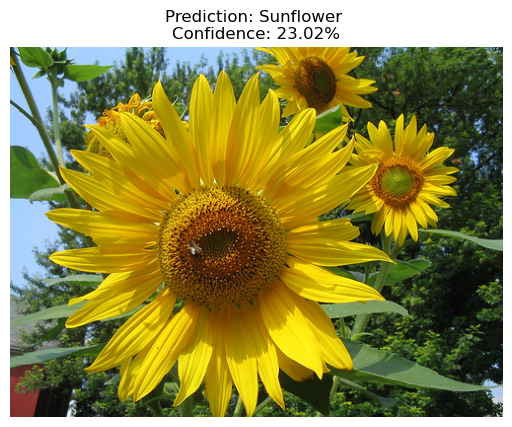

In [36]:
import matplotlib.pyplot as plt
class_labels = {0: 'Rose', 1: 'Sunflower', 2: 'Tulip', 3: 'Daisy'} 

def predict_flower(image_path, model, class_labels):
    """Predict flower type and display the image with prediction."""
    img = preprocess_image(image_path)
    if img is None:
        return

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  
    confidence = np.max(prediction) * 100  

    img_display = cv2.imread(image_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.axis("off")
    plt.title(f"Prediction: {class_labels[predicted_class]} \nConfidence: {confidence:.2f}%")
    plt.show()

test_image_path = r"D:\Hackathon-2025\KR MANGALAM\Dataset 2\flowers\TestImage.jpg"
predict_flower(test_image_path, model, class_labels)
